## Subplots

#### So far, we have simply been creating plots with the pyplot object and that works great but if you want additional plots or if you want to work with plots in a more Object Oriented manner then its best to create your plots with the subplot method.

In [2]:
%%time

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

Wall time: 1.37 s


In [3]:
plt.style.use('dark_background')

In [4]:
data = pd.read_csv('developer_data.csv')
data.head()

,Age,All_Devs,Python,JavaScript
0,18,17784,20046,16446
1,19,16500,17100,16791
2,20,18012,20000,18942
3,21,20628,24744,21780
4,22,25206,30500,25704


#### Let's plot the graphs like we are used to

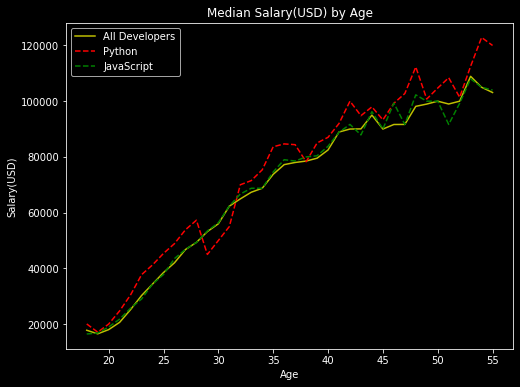

In [5]:
plt.figure(figsize=(8,6))

plt.plot(data['Age'], data['All_Devs'], 'y-', label="All Developers")
plt.plot(data['Age'], data['Python'], 'r--', label="Python")
plt.plot(data['Age'], data['JavaScript'], 'g--', label="JavaScript")
plt.title('Median Salary(USD) by Age')
plt.xlabel('Age')
plt.ylabel('Salary(USD)')
plt.legend(loc='best')

plt.show()

#### We can see that everytime we are doing something with our plot we are doing something with our plot object that we imported. We never created the plt object by ourselves.  

#### What are figures and axis?

The figure is the container holding our plots.
The axis are the actual plots. So, a figure can have multiple plots. So far, we have seen how to work with one plot within one figure (so one axis) but we can have more than one which is one we will see.

#### We have seen the following functions before

`plt.gcf()   # get the current figure` <br>
`plt.gca()   # get the current axis`

This is the staple way of doing this. But there is another way, the object oriented way of doing this which takes use of the subplot methods.

#### Let's create the same plots we did earlier but instead of using the pyplot object, we will instead instantiate an axis.

In [6]:
data.head()

,Age,All_Devs,Python,JavaScript
0,18,17784,20046,16446
1,19,16500,17100,16791
2,20,18012,20000,18942
3,21,20628,24744,21780
4,22,25206,30500,25704


In [7]:
ages = data['Age']

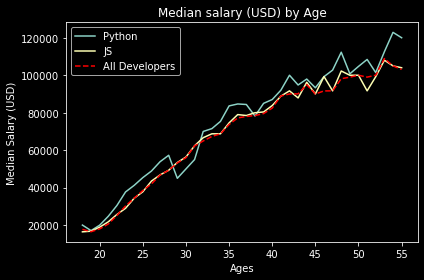

In [8]:
fig, ax = plt.subplots()   # ax can be though of as plots. default is 1X1 which is one graph

ax.plot(ages, data['Python'], label="Python")
ax.plot(ages, data['JavaScript'], label="JS")
ax.plot(ages, data['All_Devs'], 'r--', label="All Developers")
ax.legend()

ax.set_title('Median salary (USD) by Age')
ax.set_xlabel('Ages')
ax.set_ylabel('Median Salary (USD)')

plt.tight_layout()
plt.show()

#### Why are we learning this?

Let's say instead of having all of this data in one plot we wanted Python and JS to be in one plot and the JS data to be in a different plot. We can simply add more axes.

[<AxesSubplot:> <AxesSubplot:>]


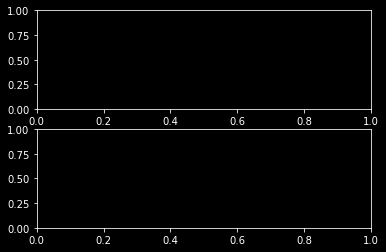

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1)
print(ax)

AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


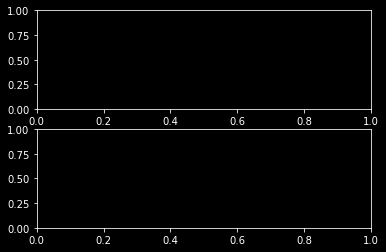

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
print(ax1)
print(ax2)

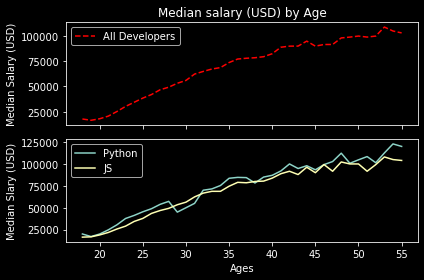

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)    #enabling sharex will make the plot hare the x-axis
ax2.plot(ages, data['Python'], label="Python")
ax2.plot(ages, data['JavaScript'], label="JS")
ax1.plot(ages, data['All_Devs'], 'r--', label="All Developers")
ax1.legend()
ax2.legend()

ax1.set_title('Median salary (USD) by Age')
#ax1.set_xlabel('Ages')
ax1.set_ylabel('Median Salary (USD)')

#ax2.set_title('Median slary (USD) by Age')
ax2.set_xlabel('Ages')
ax2.set_ylabel('Median Slary (USD)')

plt.tight_layout()
plt.show()

#### Now we observe that the plot are in the same figure. If we want them to be in different figure, we can just create a new figure.

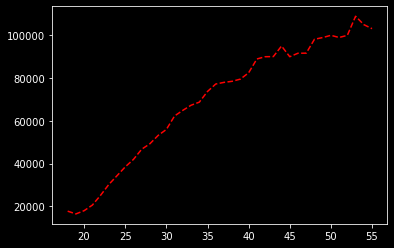

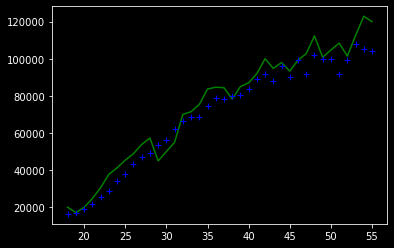

In [12]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.plot(ages, data['All_Devs'], 'r--')
ax2.plot(ages, data['Python'], 'g-')
ax2.plot(ages, data['JavaScript'], 'b+')

plt.show()

#### To save the figure

In [13]:
fig2.savefig('salary_comparison.png')

## Animation

<a href = "https://www.youtube.com/watch?v=F57_0XPdhD8">Video! </a>

<a href= "https://blog.finxter.com/matplotlib-animation/">Article.</a>

Creating animations with matplotlib is different from creating static plots.

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

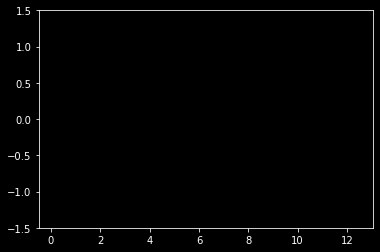

In [15]:
# Set up empty figure, axes and line object
fig, ax = plt.subplots()

# set axes limits because animations are not good at figuring out the limitss
ax.set(xlim=(-0.5, 4*np.pi+0.5), ylim=(-1.5, 1.5))

# Draw a blank line
line, = ax.plot([], [], color='purple')   # plot method returns a tuple of line objects and we want to unpack that and have access to the line object and thus we add a comma 

#### We are animating this line. On each frame, the line is going to be modified.

In [16]:
%%time
# Define data - one cosine wave

x = np.linspace(0, 4*np.pi, num=100)
y = np.cos(x)


# Define animate function

def animate(i):                    # i is the frame
    line.set_data(x[:i], y[:i])    # selecting the first i elements from each list
    return line,                   # comma because it needs to return an iterable

Wall time: 674 µs


In [17]:
%%time

# Pass to FuncAnimation

anim = FuncAnimation(fig, animate, frames=len(x)+1, interval=25, blit=True)
# interval is in milliseconds
# blit ensures that only the change in frame is plotted and not the entire plot in every frame

Wall time: 106 ms


### Saving the animation:

1. `anim.save('cos.mp4')`  
2. `anim.save('name.gif', writer=imagemagick)`
3. `from IPython.display import HTML`
    `HTML(anim.to_html5_video())`
<br><br>
   
<i><b>FFmpeg must be installed for the animation to be saved as mp4
<br>
imagemagic must be installed for the image to be saved as gif</i></b>
<br><br>
Note that both FFmpeg and imagemagic are command-line tools and not python libraries. As such, you cannot install them using pip.

In [18]:
%%time
from IPython.display import HTML

HTML(anim.to_html5_video())

Wall time: 6.97 s


#### The other option is to change the plt.rcParams dictionary. The dictionary controls the default behaviour for all your matplotlib plots such as figure size, font size, and how your animations should display when you call them.<br>

If you print it to the screen, you can see all the parameters that it controls.

<b>The one we are interested in is</b> `animation.html` <b>which is None by default. The other options are: </b> `html5` and `jshtml`

In [19]:
%%time
plt.rcParams['animation.html'] = 'jshtml'
anim

Wall time: 0 ns
